<a href="https://colab.research.google.com/github/SerHol17/ClaseMaestria/blob/main/Pendulo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Comparación de Métodos en la Modelización de un Péndulo No Lineal: Enfoques Analíticos, Numéricos y Experimentales**

**Plantemianto del problema**

El movimiento de un péndulo no lineal representa un desafío interesante en la física, especialmente cuando se consideran ángulos amplios de oscilación, lo que introduce no linealidades significativas en su comportamiento. Los modelos tradicionales de péndulo simple, que asumen pequeñas oscilaciones, ya no son aplicables, requiriendo enfoques más complejos para una descripción precisa. Este proyecto busca explorar y comparar la efectividad de métodos analíticos, numéricos implementados en Python y experimentales en la modelización del comportamiento dinámico de un péndulo no lineal.

**Metodología**



*   Construcción de un pendulo
*   Grabación a diferentes angulos
*   Uso de software para el analisis de movimiento como kinovea o Tracker
* Implementación del metodo analitico en python
* Implementación del metodo numerico en python
* Simulación con los valores obtenidos en el software de simulación de movimiento



#Liberias e hiperparametros



*   Numpy: Manejo de matrices y arreglos
*   Pandas: Manejo y analisis exploratorio de datos
* Matplotlib: Visualización grafica de datos
* odeint y solve_ivp: Son funciones para la integración de ecuaciones diferenciales ordinarias (EDO). odeint es más antigua y sencilla, mientras que solve_ivp es la interfaz moderna que ofrece más opciones y flexibilidad.

* Curve_fit: Es una función para el ajuste de curvas que utiliza mínimos cuadrados no lineales para ajustar una función a un conjunto de datos.



In [ ]:
#Librerias
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import solve_ivp

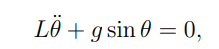

In [ ]:
#Hiperparametros
l = 0.158  # Longitud (mts)
g = 9.81  # Gravedad (mts/s2)

#Funciones para hallar las ecuaciones diferenciales y metodos numericos.



* La función mas calcula el desplazamiento angular (theta) de un movimiento armónico simple (MAS) en función del tiempo (t), la amplitud máxima angular (theta_m), la frecuencia angular natural (omega_n), y la fase inicial (phi). La función ajusta unidades y ángulos para calcular correctamente el desplazamiento angular en radianes.

* Pendulum: Modela las ecuaciones diferenciales de segundo orden que describen el movimiento de un péndulo simple bajo la influencia de la gravedad, sin considerar la resistencia del aire.

* Theta_ Analytic: Calcula la posición angular (theta) del péndulo en un tiempo t usando la solución analítica para un péndulo en oscilaciones pequeñas, donde el ángulo es aproximado como un movimiento armónico simple.

* theta_analytical_deg: Li mismo que en la anterior, pero en grados




In [ ]:
# Funciones
def mas(t, theta_m, omega_n, phi):
    t = t / 1000
    omega_n = np.degrees(omega_n)
    return theta_m * np.sin(np.radians(omega_n * t + phi))

def pendulum(t, y):
    theta, omega = y
    dtheta_dt = omega
    domega_dt = -(g / l) * np.sin(theta)
    return [dtheta_dt, domega_dt]

def theta_analytical(t):
    return theta_0 * np.cos(np.sqrt(g / l) * t)

def theta_analytical_deg(t):
    return np.rad2deg(theta_0) * np.cos(np.sqrt(g / l) * t)

#Angulo pequeño (8 grados)

Primer experimento un angulo pequeño donde el metodo numerico y el analitico deben funcionar de manera similar.


Es Importante tener en cuenta que el periodo fue de 800 milisegundos

##Carga de datos

In [ ]:
df=pd.read_excel("/content/Data_T010.xlsx")

In [ ]:
df=pd.DataFrame(df)
times = df["Tiempo (ms)"].to_numpy()
angles = df["Angulo 1"].to_numpy()
theta_0_deg = 7.8 # ángulo inicial en grados es un hiperparametro pero no se puede generalizar porque es el que se varia según el experimento
theta_0 = np.deg2rad(theta_0_deg)

##Metodo Experimental

Grafica del metodo experimental con su regresiónn usando la libreria CurveFit explicada anteriomente

Frecuencia angular natural ajustada: 7.53976752729414 grados/s


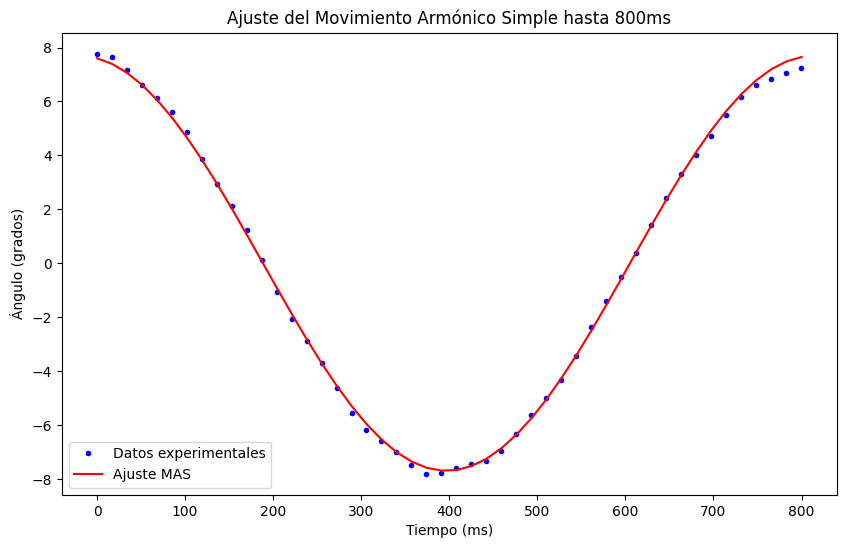

In [ ]:
t_eval = np.linspace(0, 800, len(df["Tiempo (ms)"]))
popt, pcov = curve_fit(mas, t_eval, np.interp(t_eval, times, angles), p0=[max(angles), 2 * np.pi / 0.8, 0])
theta_m_opt, omega_n_opt, phi_opt = popt
print(f"Frecuencia angular natural ajustada: {omega_n_opt} grados/s")
# Gráfica de ajuste MAS
plt.figure(figsize=(10, 6))
plt.plot(times, angles, 'b.', label='Datos experimentales')
plt.plot(t_eval, mas(t_eval, *popt), 'r-', label='Ajuste MAS')
plt.title('Ajuste del Movimiento Armónico Simple hasta 800ms')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Ángulo (grados)')
plt.legend()
plt.show()

##Metodo numerico y analitico

In [ ]:
sol = solve_ivp(pendulum, [t_eval[0] / 1000, t_eval[-1] / 1000], [theta_0,0], t_eval=t_eval / 1000)
sol_y_deg = np.rad2deg(sol.y[0])

##Grafica

Evaluación de las 3 graficas, claramente en angulos pequeños el modelo analitico y el numerico funcionan de manera muy similar, en teoria la grafica deberia dar el mismo resultado sin embargo la diferencia en frecuencia es clara y se puede atribuir a multiples factores como errores en la grabación o en los datos exportados por el software. Error de experimantación

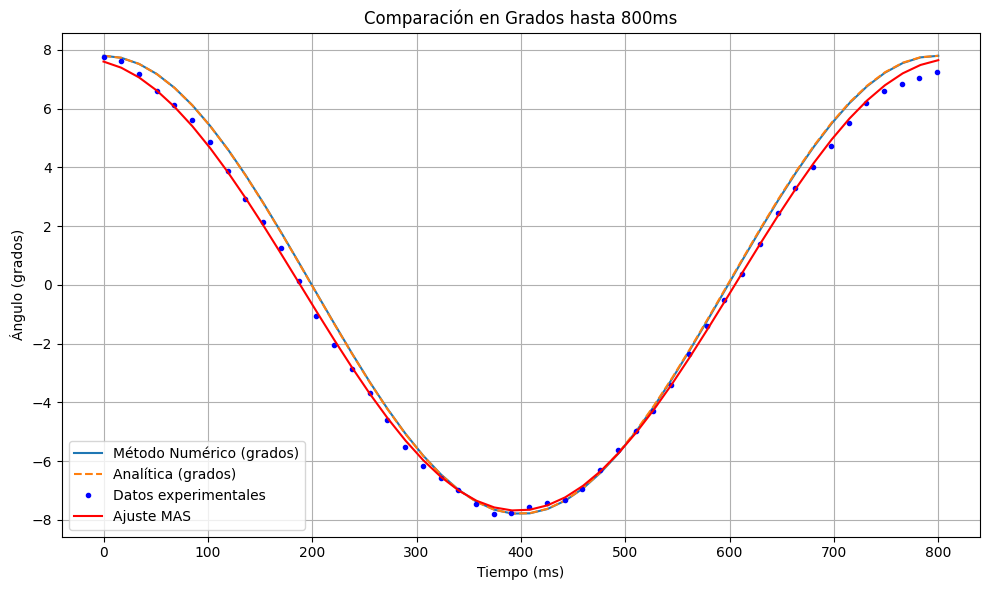

In [ ]:
# Gráfica de comparación
plt.figure(figsize=(10, 6))
plt.plot(sol.t * 1000, sol_y_deg, label='Método Numérico (grados)')
plt.plot(t_eval, theta_analytical_deg(t_eval / 1000), '--', label='Analítica (grados)')
plt.plot(times, angles, 'b.', label='Datos experimentales')
plt.plot(t_eval, mas(t_eval, *popt), 'r-', label='Ajuste MAS')
plt.title('Comparación en Grados hasta 800ms')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Ángulo (grados)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#Angulo Grande (40 grados)

##Carga de datos

In [ ]:
df=pd.read_excel("/content/Data_T040.xlsx")

In [ ]:
df=pd.DataFrame(df)
times = df["Tiempo (ms)"].to_numpy()
angles = df["Angulo 1"].to_numpy()
theta_0_deg = 37
theta_0 = np.deg2rad(theta_0_deg)

##Metodo Experimental

Frecuencia angular natural ajustada: 7.743498887042096 grados/s


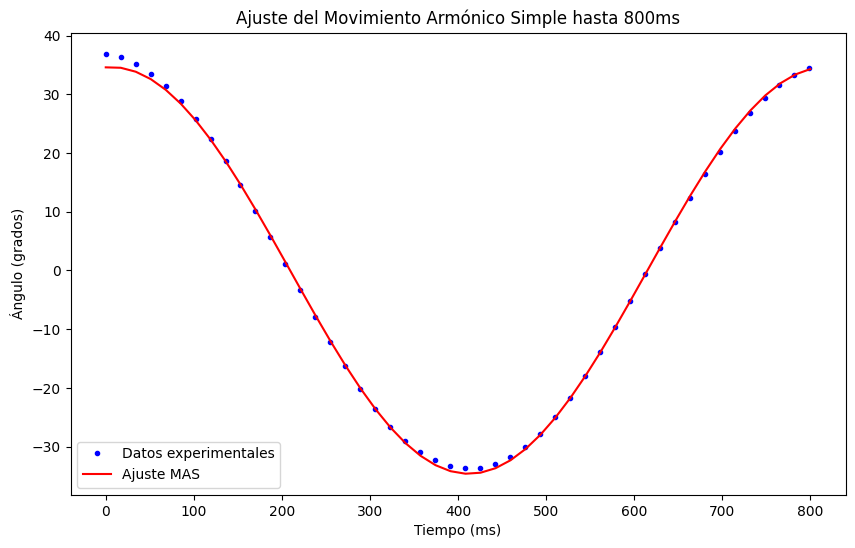

In [ ]:
t_eval = np.linspace(0, 800, len(df["Tiempo (ms)"]))
popt, pcov = curve_fit(mas, t_eval, np.interp(t_eval, times, angles), p0=[max(angles), 2 * np.pi / 0.8, 0])
theta_m_opt, omega_n_opt, phi_opt = popt
print(f"Frecuencia angular natural ajustada: {omega_n_opt} grados/s")

# Gráfica de regresión
plt.figure(figsize=(10, 6))
plt.plot(times, angles, 'b.', label='Datos experimentales')
plt.plot(t_eval, mas(t_eval, *popt), 'r-', label='Ajuste MAS')
plt.title('Ajuste del Movimiento Armónico Simple hasta 800ms')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Ángulo (grados)')
plt.legend()
plt.show()

##Metodo numerico y analitico

In [ ]:
sol = solve_ivp(pendulum, [t_eval[0] / 1000, t_eval[-1] / 1000], [theta_0,0], t_eval=t_eval / 1000)
sol_y_deg = np.rad2deg(sol.y[0])

##Grafica

En angulos grandes vemos que el metodo numerico y el analitico tienen un desface mmuy grande, además al igual que en el anterior, la grafica experimental muestra una frecuencia diferente y de igual manera es posible que sea un error en la experimentación.

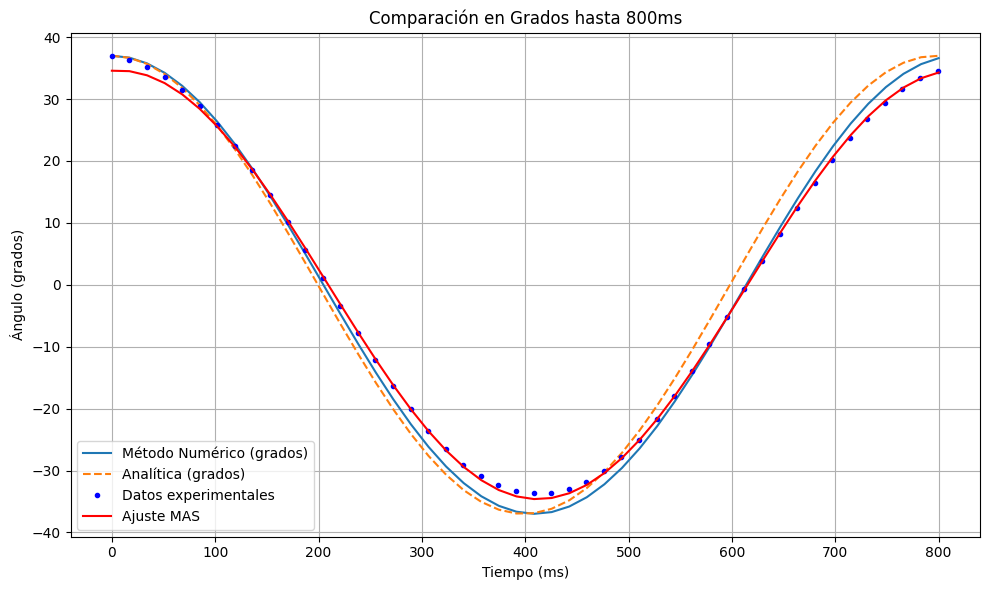

In [ ]:
# Gráfica de comparación
plt.figure(figsize=(10, 6))
plt.plot(sol.t * 1000, sol_y_deg, label='Método Numérico (grados)')
plt.plot(t_eval, theta_analytical_deg(t_eval / 1000), '--', label='Analítica (grados)')
plt.plot(times, angles, 'b.', label='Datos experimentales')
plt.plot(t_eval, mas(t_eval, *popt), 'r-', label='Ajuste MAS')
plt.title('Comparación en Grados hasta 800ms')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Ángulo (grados)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#Conclusión

Los metodos numericos son muy eficientes para manejar angulos grandes de oscilacaión en el pendulo, además el uso de lenguajes de programación como python demuestran ser utiles para facilitar los calculos gracias a sus funciones ya establecidas. El error experimental es muy alto pero es entendible debido a que el experimento no se realizó en condiciones completamente controlables, así que es experable que la frecuencia sea distinta pero que existan puntos en común